In [1]:
import tensorflow as tf

In [15]:
import os
base_dir = "D:/datasets/DATASET/"

train_dir = os.path.join(base_dir, "TRAIN")
test_dir = os.path.join(base_dir, "TEST")

In [16]:
os.listdir(train)

['Organic', 'Recycle']

In [61]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

In [75]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [76]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [77]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [78]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy']
)

In [92]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25, # tambahkan epochs jika akurasi model belum optimal
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=20,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
)

Epoch 1/25
250/250 - 78s - loss: 0.4882 - accuracy: 0.7950 - val_loss: 0.4355 - val_accuracy: 0.8625 - 78s/epoch - 313ms/step
Epoch 2/25
250/250 - 74s - loss: 0.4516 - accuracy: 0.8080 - val_loss: 0.6582 - val_accuracy: 0.6625 - 74s/epoch - 294ms/step
Epoch 3/25
250/250 - 66s - loss: 0.4203 - accuracy: 0.8080 - val_loss: 0.3725 - val_accuracy: 0.8500 - 66s/epoch - 265ms/step
Epoch 4/25
250/250 - 60s - loss: 0.4439 - accuracy: 0.8220 - val_loss: 0.3615 - val_accuracy: 0.8875 - 60s/epoch - 241ms/step
Epoch 5/25
250/250 - 70s - loss: 0.4507 - accuracy: 0.8030 - val_loss: 0.4031 - val_accuracy: 0.8375 - 70s/epoch - 280ms/step
Epoch 6/25
250/250 - 77s - loss: 0.4093 - accuracy: 0.8200 - val_loss: 0.4647 - val_accuracy: 0.8375 - 77s/epoch - 308ms/step
Epoch 7/25
250/250 - 70s - loss: 0.4369 - accuracy: 0.7970 - val_loss: 0.4119 - val_accuracy: 0.8000 - 70s/epoch - 280ms/step
Epoch 8/25
250/250 - 79s - loss: 0.4297 - accuracy: 0.7990 - val_loss: 0.4091 - val_accuracy: 0.8375 - 79s/epoch - 315

In [93]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'Organic': 0, 'Recycle': 1}
{'Organic': 0, 'Recycle': 1}


In [94]:
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 30ms/step
Recycle


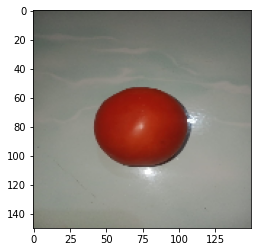

In [95]:
from tensorflow.keras.preprocessing import image
img = image.load_img("D:/datasets/DATASET/coba/apa ini (4).jpeg", target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)

if classes==0:
    print('Organic')
else:
    print('Recycle')